# Лекция 12. Ансамблевые методы повышения качества моделирования

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from numpy import loadtxt
# conda install py-xgboost
# conda install -c anaconda py-xgboost  - появилась Teano
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import learning_curve,GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

In [2]:
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

## Ансамбли деревьев решений

How to Improve Machine Learning Results: https://machinelearningmastery.com/how-to-improve-machine-learning-results/

Ансамблевые методы связаны с объединением результатов нескольких методов для получения улучшенных результатов.

Ансамбли (ensembles) – это методы, которые сочетают в себе множество
моделей машинного обучения, чтобы в итоге получить более мощную
модель.

Это может быть достигнуто многими способами. Существуют три **ансамблевые стратегии**:
* **Bagging** - Упаковка в пакеты - более формально известная как **Bootstrapped Aggregation**, когда один и тот же алгоритм получает различные точки зрения на проблему, обучаясь на различных подмножествах обучающих данных.
* **Boosting** - Повышение - различные алгоритмы обучаются на одних и тех же данных обучения. Конечный результат представляет собой линейную комбинацию промежуточных результатов.
* **Blending** - Смешивание - более формально известное, как Stacked Generalization, или **Stacking**, - это множество моделей, чьи прогнозы принимаются в качестве входных данных для новой модели, которая определяет, как объединять прогнозы в общий прогноз.

### Ансамбль "Случайный лес" (Random Forest)

Ансамбль "Случайный лес" (Random Forest) - это пример применения приема Bagging.

Метод предложен Leo Breiman в статье "Random Forests". Machine Learning V45(1): 5-32(2001)

Давайте применим случайный лес, состоящий из пяти деревьев, к набору
данных two_moons.

In [3]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

Посмотрим на точность модели.

In [4]:
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.960
Правильность на тестовом наборе: 0.920


Деревья, которые строятся в рамках случайного леса, сохраняются в
атрибуте estimator_. 

В отличие от отдельных деревьев случайный лес переобучается в
меньшей степени и дает гораздо более чувствительную (гибкую) границу
принятия решений. В реальных примерах используется гораздо большее
количество деревьев (часто сотни или тысячи), что приводит к
получению еще более чувствительной границы.

В качестве еще одного примера давайте построим случайный лес,
состоящий из 100 деревьев, на наборе данных Breast Cancer:

In [5]:
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.972


Без настройки каких-либо параметров случайный лес дает нам
правильность 97%, это лучше результата линейных моделей или
одиночного дерева решений. Мы могли бы отрегулировать настройку
max_features или применить предварительную обрезку, как это делали
для одиночного дерева решений. Однако часто параметры случайного
леса, выставленные по умолчанию, работают уже сами по себе достаточно
хорошо.

В качестве еще одного примера давайте построим случайный лес на наборе данных об ирисах:

In [6]:
iris_dataset = load_iris()

Разобьем данные на обучающую и тестовую части.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

Вызовем функцию RandomForestClassifier из модуля ensemble библиотеки (пакета) sklearn. 

In [8]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=1)

Посмотрим на точность модели.

In [9]:
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.982
Правильность на тестовом наборе: 0.921


In [10]:
#Зададим параметры некоторого ириса, сорт которого мы хотим узнать.
X_new = np.array([[5, 2.9, 1, 0.2]])
print("Форма массива X_new:", X_new.shape)

Форма массива X_new: (1, 4)


Чтобы сделать прогноз, вызываем метод predict объекта forest.

In [11]:
prediction = forest.predict(X_new)
print("Прогноз:", prediction)
print("Спрогнозированная метка:",
       iris_dataset['target_names'][prediction])

Прогноз: [0]
Спрогнозированная метка: ['setosa']


Как и дерево решений, случайный лес позволяет вычислить важности признаков, которые рассчитываются путем агрегирования значений важности по всем деревьям леса. Как правило, важности признаков, вычисленные случайным лесом, являются более надежным показателем, чем важности, вычисленные одним деревом.

In [12]:
def plot_feature_importances_iris(model):
    n_features=iris_dataset.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),iris_dataset.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")

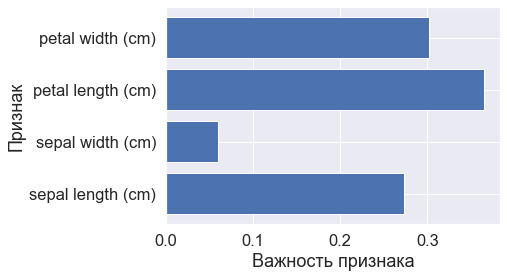

In [13]:
plot_feature_importances_iris(forest)

Как видно из рисунка, случайный лес в качестве наиболее информативного признака выбирает petal length.

## AdaBoost

Теория: 
* Python_i_mashinnoe_obuchenie: с. 214-221 (Рашка С. Python и машинное обучение / пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017. - 418 с.)
* ESLII_print12: с. 337-358

Натренируем ансамблевый классификатор AdaBoost посредством библиотеки
scikit-learn. Мы воспользуемся подмножеством сортов вин. Используя атрибут base_estimator, натренируем классификатор AdaBoostClassifier на 500 пеньках деревьев решений:

In [14]:
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=0)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=0)

In [15]:
df_wine = pd.read_csv('C:/Users/HP/Documents/analysis/forcasting/data/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]

y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Hue']].values

In [16]:
X_train, X_test, y_train, y_test =\
            train_test_split(X, y, 
                             test_size=0.40, 
                             random_state=1)

In [17]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.845/0.854
AdaBoost train/test accuracies 1.000/0.875


Как видно, пенек дерева решений показывает тенденцию к недообучению под тренировочные данные. Как видно, модель AdaBoost правильно идентифицирует все метки классов тренировочного набора и также показывает слегка улучшенное качество на тестовом наборе, по сравнению с пеньком дерева решений. Однако мы также видим, что вместе с нашей попыткой уменьшить смещение модели мы привнесли дополнительную дисперсию.

Наконец, проверим, как выглядят области решений:

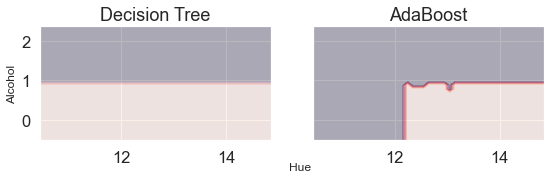

In [18]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2, 
                        sharex='col', 
                        sharey='row', 
                        figsize=(8, 3))


for idx, clf, tt in zip([0, 1],
                        [tree, ada],
                        ['Decision Tree', 'AdaBoost']):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')

    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='red', marker='o')

    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2,
         s='Hue',
         ha='center', va='center', fontsize=12)

plt.tight_layout()
# plt.savefig('./figures/bagging_region.png',
#            dpi=300,
#            bbox_inches='tight')
plt.show()

Рассматривая области решений, мы видим, что граница решения модели AdaBoost существенно сложнее границы решения пенька решения.

## Градиентный бустинг деревьев регрессии (машины градиентного бустинга, GBM)

Ниже приведен пример использования GradientBoostingClassifier
на наборе данных Breast Cancer. По умолчанию используются 100
деревьев c максимальной глубиной 3 и скорости обучения 0.1:

In [19]:
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.965


Поскольку правильность на обучающем наборе составляет 100%, мы,
вероятно, столкнулись с переобучением. Для уменьшения переобучения
мы можем либо применить более сильную предварительную обрезку,
ограничив максимальную глубину, либо снизить скорость обучения:

In [20]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.972


In [21]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.965


Как и ожидалось, эти методы, направленные на уменьшение
сложности модели, снижают правильность на обучающем наборе. В
данном случае снижение максимальной глубины деревьев значительно
улучшило модель, тогда как скорость обучения лишь незначительно
повысило обобщающую способность.

И вновь, как и в случае с остальными моделями на основе деревьев,
мы можем визуализировать важности признаков, чтобы получить более
глубокое представление о нашей модели. Поскольку мы
использовали 100 деревьев, вряд ли целесообразно проверять все
деревья, даже если все они имеют глубину 1:

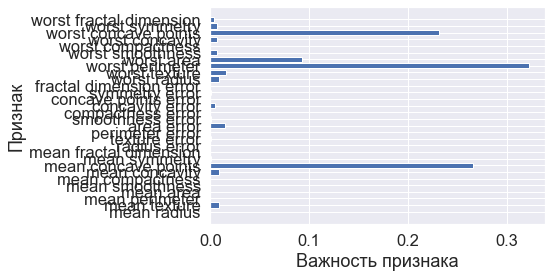

In [22]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(gbrt)

На рисунке видно, что важности признаков, вычисленные
градиентным бустингом деревьев, в какой-то степени схожи с
важностями признаков, полученными с помощью случайного леса, хотя
градиентный бустинг полностью проигнорировал некоторые признаки.

## Аббакумов

### GBM

Задача.
Нужно предсказать доход человека (больше $50000 или меньше) по результатам его ответов в ходе переписи населения.<br>
https://archive.ics.uci.edu/ml/datasets/Adult

Описание данных:<br>
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [36]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', header=None, names=columns, na_values=' ?')
# Удаляем колонку education (потому что есть уже закодированная колонка education-num)
df = df.drop('education', axis=1)
# Кодируем отклик в бинарные значения
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
# удаляем строки с NA значениями
df = df.dropna()

test = pd.read_csv('adult.test', header=None, names=columns, na_values=' ?', skiprows=1)
test = test.drop('education', axis=1)
test['income'] = test['income'].map({' <=50K.': 0, ' >50K.': 1})
test = test.dropna()

In [37]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Посчитаем распределение классов в отклике.

In [38]:
df['income'].value_counts(normalize=True)

0    0.751078
1    0.248922
Name: income, dtype: float64

Разбиваем датасет на лёрн и тест. Бинаризуем категориальные признаки (эта операция ещё называется one-hot encoding).

In [39]:
X_train = pd.get_dummies(df).drop('income', axis=1)
y_train = df['income']

X_test = pd.get_dummies(test).drop('income', axis=1)
y_test = test['income']

После бинаризации категориальных признаков окажется, что в обучающем множестве содержится на одну колонку больше. Это от того, что в тестовой выборке нет ни одного представителя Голландии в колонке ```native-county```.

In [40]:
print(len(X_train.columns))
print(len(X_test.columns))
# Приводим множество названий колонок к типу set, находим разность двух множеств.
print(set(X_train.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X_train.columns))

88
87
{'native-country_ Holand-Netherlands'}
set()


Чтобы полечить это, создадим полный список всех колонок (из трейна и из теста) и переиндексируем колонки в соответствии с этим списком. В результате в колонке ```native-country_ Holand-Netherlands``` в тесте появятся NaN-значения, которые мы заменим на нули.

In [41]:
columns = set(X_train.columns) | set(X_test.columns)
X_train = X_train.reindex(columns=columns).fillna(0)
X_test = X_test.reindex(columns=columns).fillna(0)

Теперь колонки в трейне и в тесте должны быть идентичными. В том числе идентичным должен быть и порядок колонок. На всякий случай убедимся в этом. 

In [42]:
# Команда all проверяет, все ли значения из входного списка равны True
all(X_train.columns == X_test.columns)

True

Перейдём, наконец, к обучению модели.

### GradientBoostingClassifier

In [43]:
model = GradientBoostingClassifier(random_state=42,
                                   # Число деревьев
                                   n_estimators=500,
                                   #  загрязнение измеряем “mse”, “mae” или “friedman_mse” (mse с улучшениями),  
                                   criterion='friedman_mse', 
                                   # Максимальная глубина каждого дерева
                                   #  критерий качества ‘deviance’ (кросс-энтропия) или ‘exponential’ (как в AdaBoost)
                                   #  ‘deviance’ для классификации с вероятностями на выходе
                                   loss='deviance', 
                                   # минимальное уменьшение загрязнения 
                                   min_impurity_decrease=0.0, 
                                   # Устарело
                                   min_impurity_split=None,
                                   # число узлов в дереве (сравни с RandomForest) !!!!!!!!!!!!!
                                   max_depth=5,
                                   # минимальное число наблюдений в узле потомке
                                   min_samples_leaf=5, 
                                   # минимальное число наблюдений в узле родителе
                                   min_samples_split=10,
                                   # Параметр, уменьшающий переобучение, являющемся весом отдельного дерева.
                                   # Рекомендуется выставлять небольшие значения из (0, 0.3].
                                   learning_rate=0.01
                                   # Есть и другие параметры, уменьшающие размер дерева,
                                   # такие же как у DecisionTreeClassifier
                                   )


In [44]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=5,
                           min_samples_split=10, n_estimators=500,
                           random_state=42)

In [45]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11360
           1       0.80      0.63      0.70      3700

    accuracy                           0.87     15060
   macro avg       0.84      0.79      0.81     15060
weighted avg       0.86      0.87      0.86     15060



In [46]:
y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22654
           1       0.81      0.63      0.71      7508

    accuracy                           0.87     30162
   macro avg       0.85      0.79      0.81     30162
weighted avg       0.87      0.87      0.86     30162



In [47]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,10773,587
1,1381,2319


In [48]:
conf_mat = metrics.confusion_matrix(y_train, y_pred_train)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,21523,1131
1,2773,4735


Посмотрим на важность признаков.

In [49]:
fi = pd.DataFrame({'features': X_train.columns, 'importance': model.feature_importances_})
fi.sort_values('importance', ascending=False).head(10)

,features,importance
14,marital-status_ Married-civ-spouse,0.381497
51,education-num,0.202413
17,capital-gain,0.199387
82,capital-loss,0.063016
0,age,0.053452
65,hours-per-week,0.030752
26,occupation_ Exec-managerial,0.016239
55,occupation_ Prof-specialty,0.007146
69,workclass_ Self-emp-not-inc,0.005784
80,occupation_ Other-service,0.005507


## XGBoost

https://machinelearningmastery.com/category/xgboost/

In [50]:
# First XGBoost model for Pima Indians dataset
# load data
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

In [51]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.02%


### Промежуточные результаты и ранняя остановка

Мы можем прекратить обучение, если не происходит никаких улучшений при обучении модели. Мы можем сделать это, установив параметр ранних остановок early stopping rounds при вызове model.fit () для количества итераций, в течение которых не видны улучшения в наборе данных проверки, после которых процесс обучения будет остановлен.

In [52]:
#fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss",
eval_set=eval_set, verbose=True)
# make predictions for test data
y_predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.60491
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.55934
[2]	validation_0-logloss:0.53068
[3]	validation_0-logloss:0.51795
[4]	validation_0-logloss:0.51153
[5]	validation_0-logloss:0.50935
[6]	validation_0-logloss:0.50818
[7]	validation_0-logloss:0.51097
[8]	validation_0-logloss:0.51760
[9]	validation_0-logloss:0.51912
[10]	validation_0-logloss:0.52503
[11]	validation_0-logloss:0.52697
[12]	validation_0-logloss:0.53335
[13]	validation_0-logloss:0.53905
[14]	validation_0-logloss:0.54546
[15]	validation_0-logloss:0.54613
[16]	validation_0-logloss:0.54982
Stopping. Best iteration:
[6]	validation_0-logloss:0.50818

Accuracy: 74.41%


### Определение важности признаков в XGBoost

Обученная модель XGBoost автоматически рассчитывает важность признаков для моделирования проблемы. Эти оценки важности доступны в переменной feature importances
обученной модели. Например, они могут быть напечатаны напрямую следующим образом:

In [53]:
print(model.feature_importances_)

[0.06669603 0.28271106 0.07985319 0.07951089 0.10537349 0.1623834
 0.10070346 0.12276844]


Можно также изобразить признаки в порядке возрастания их важности для модели.

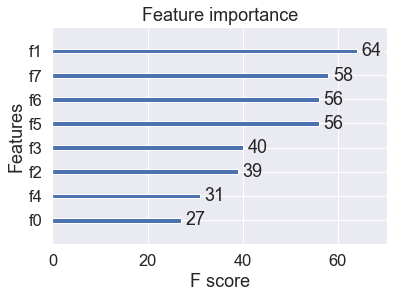

In [54]:
# plot feature importance
plot_importance(model)
plt.show()

### Как настроить модель XGBoost

Ряд **конфигурационных эвристик** был опубликован в научных статьях по данному методу. Они могут быть обобщены следующим образом:
* Скорость обучения (learning_rate в XGBoost) должна быть установлена на 0,1 или ниже, и меньшие значения потребуют добавления большего количества деревьев.
* Глубина деревьев (tree_depth в XGBoost) должна быть установлена в диапазоне от 2 до 8, причем не так много пользы видно от более глубоких деревьев.
* Выборка строк (subsample в XGBoost) должна быть настроена в диапазоне от 30% до 80% учебного набора данных, по сравнению со значением 100% для отсутствия выборки.

**При настройке вашей модели можно воспользоваться следующей стратегией**:
1. Запустите конфигурацию по умолчанию и просмотрите графики кривых обучения на обучающем наборе и на тестовом наборе данных.
2. Если система переобучается, уменьшите скорость обучения и / или увеличьте количество деревьев.
3. Если система недообучается, ускорьте обучение, увеличивая скорость обучения и / или уменьшая количество деревьев.

Оуэн Чжан, бывший участник №1 рейтинга  в Kaggle, а теперь технический директор Data Robot, предлагает интересную стратегию для настройки XGBoost. Он предлагает установить количество деревьев на уровне 100 или 1000, затем настрить скорость обучения, чтобы найти лучшую модель. Это эффективная стратегия для быстрого получения хорошей модели.

### Настройка параметров в модели XGBoost

Пакет scikit-learn предоставляет возможность поиска комбинаций параметров. Эта
возможность предоставляется в классе GridSearchCV и может использоваться, чтобы найти лучший способ настройки модели для максимальной производительности по вашей проблеме. Например, мы можем задать сетку из двух параметров - количество деревьев (n estimators) и размеры деревьев (max depth) для поиска лучшей модели:

In [55]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

Затем оценить каждую комбинацию параметров, используя 10-кратную кросс-валидацию (перекрестную оценку):

In [56]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold,
verbose=1)
result = grid_search.fit(X, Y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [57]:
# make predictions for test data
predictions = result.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.22%


Затем мы можем рассмотреть результаты, чтобы определить лучшую комбинацию параметров. **Параметры для настройки**:
* Число и размер деревьев (n estimators и max depth);
* Скорость обучения и количество деревьев (learning rate и n estimators);
* Количество строк и столбцов в подвыборках (subsample, colsample bytree и colsample bylevel).

Ниже приведен полный пример настройки только скорости обучения модели на данных о диабете.

In [58]:
# Tune learning_rate
# load data
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

In [59]:
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)

In [60]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.530152 using {'learning_rate': 0.01}
-0.689563 (0.000760) with: {'learning_rate': 0.0001}
-0.660868 (0.006202) with: {'learning_rate': 0.001}
-0.530152 (0.034452) with: {'learning_rate': 0.01}
-0.552723 (0.117636) with: {'learning_rate': 0.1}
-0.653341 (0.171609) with: {'learning_rate': 0.2}
-0.718789 (0.176641) with: {'learning_rate': 0.3}


In [61]:
# make predictions for test data
predictions = grid_result.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.94%


## Аббакумов

## XGBoost

Разберём задачу, в которой нужно предсказать доход человека (больше $50000 или меньше) по результатам переписи населения.
https://archive.ics.uci.edu/ml/datasets/Adult

Описание данных:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [76]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', header=None, names=columns, na_values=' ?')
# Удаляем колонку education (потому что есть уже закодированная колонка education-num)
df = df.drop('education', axis=1)
# Кодируем отклик в бинарные значения
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
# удаляем строки с NA значениями
df = df.dropna()

test = pd.read_csv('adult.test', header=None, names=columns, na_values=' ?', skiprows=1)
test = test.drop('education', axis=1)
test['income'] = test['income'].map({' <=50K.': 0, ' >50K.': 1})
test = test.dropna()

In [77]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Посчитаем распределение классов в отклике.

In [78]:
df['income'].value_counts(normalize=True)

0    0.751078
1    0.248922
Name: income, dtype: float64

Разбиваем выборку на обучающую и тестовую. 

In [79]:
X_train = pd.get_dummies(df).drop('income', axis=1)
y_train = df['income']

Бинаризуем категориальные признаки (эта операция ещё называется one-hot encoding).

In [80]:
X_test = pd.get_dummies(test).drop('income', axis=1)
y_test = test['income']

После бинаризации категориальных признаков оказалось, что в обучающем множестве содержится на одну колонку больше. Причина: в тестовую выборку не попал ни один представитель Голландии (см. колонку native-county). Проверяем

In [81]:
print (len(X_train.columns))
print (len(X_test.columns))
# Приводим множество названий колонок к типу set, находим разность двух множеств.
print(set(X_train.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X_train.columns))

88
87
{'native-country_ Holand-Netherlands'}
set()


Исправляем. 
Создадим полный список всех колонок (из трейна и из теста) и переиндексируем колонки в соответствии с этим списком. В результате в колонке native-country_ Holand-Netherlands в тестовом множестве появятся NaN-значения, которые мы заменим на нули.

In [82]:
columns = set(X_train.columns) | set(X_test.columns)
X_train = X_train.reindex(columns=columns).fillna(0)
X_test = X_test.reindex(columns=columns).fillna(0)

Теперь колонки в обучающей и тестовой выборках должны быть идентичными. 
В том числе идентичным должен быть и порядок колонок. 
На всякий случай проверим.

In [83]:
# Команда all проверяет, все ли значения из входного списка равны True
all(X_train.columns == X_test.columns)

True

Перейдём, наконец, к обучению модели.
Хотя, если честно, можно многое улучшить.
Например, объединить некоторые колонки.

## XGBoost

In [84]:
model = XGBClassifier(seed=42,
                      n_estimators=100,
                      max_depth=6,
                      learning_rate=0.3)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print (classification_report(y_train, y_pred_train))

y_pred = model.predict(X_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     22654
           1       0.84      0.73      0.78      7508

    accuracy                           0.90     30162
   macro avg       0.88      0.84      0.86     30162
weighted avg       0.90      0.90      0.90     30162

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11360
           1       0.77      0.66      0.71      3700

    accuracy                           0.87     15060
   macro avg       0.83      0.80      0.81     15060
weighted avg       0.86      0.87      0.87     15060



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

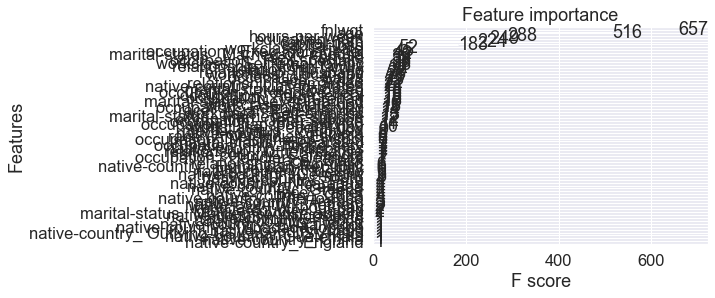

In [85]:
xgb.plot_importance(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

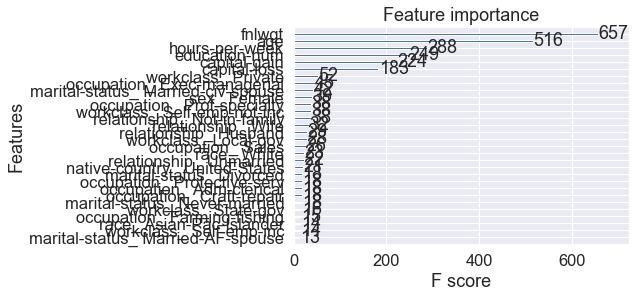

In [86]:
xgb.plot_importance(model, max_num_features = 30)

In [87]:
grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [3, 4, 6],
    'learning_rate': [0.05, 0.1, 0.3]
}

In [88]:
model = XGBClassifier(seed=42,
                      n_estimators=100,
                      max_depth=6,
                      learning_rate=0.3)

In [89]:
zzz = GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, 
       colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=True, subsample=0.8), n_jobs=-1,
       param_grid={'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)


In [90]:
zzz.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=0.5, booster=None,
                                     colsample_bylevel=1, colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=1234, silent=True,
                                     subsample=0.8, tree_method=None,
       

In [91]:
sorted(zzz.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_min_child_weight',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [92]:
zzz.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_child_weight', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [93]:
zzz.cv_results_

{'mean_fit_time': array([10.83905435, 11.14179387, 11.38033357, 15.77180715, 15.66511793,
        15.63656507, 22.22903528, 21.89672608, 16.58448176]),
 'std_fit_time': array([0.04264724, 0.32087873, 0.13262822, 0.27976223, 0.13772545,
        0.10544185, 0.59369364, 0.96436749, 0.2032731 ]),
 'mean_score_time': array([0.05893207, 0.06701226, 0.06004992, 0.0588047 , 0.06757231,
        0.06957049, 0.08398933, 0.06869226, 0.04517274]),
 'std_score_time': array([0.0144438 , 0.01338292, 0.01482856, 0.00436057, 0.00465544,
        0.00656949, 0.01297935, 0.01118244, 0.00426549]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_val